In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import savefig
from sklearn.ensemble import IsolationForest

In [0]:
# Generating data ----

rng = np.random.RandomState(42)

# Generating training data 
X_train = 0.2 * rng.randn(1000, 2)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])

# Generating new, 'normal' observation
X_test = 0.2 * rng.randn(2000, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])

# Generating outliers
X_outliers = rng.uniform(low=-2, high=5, size=(200, 2))
X_outliers = pd.DataFrame(X_outliers, columns = ['x1', 'x2'])

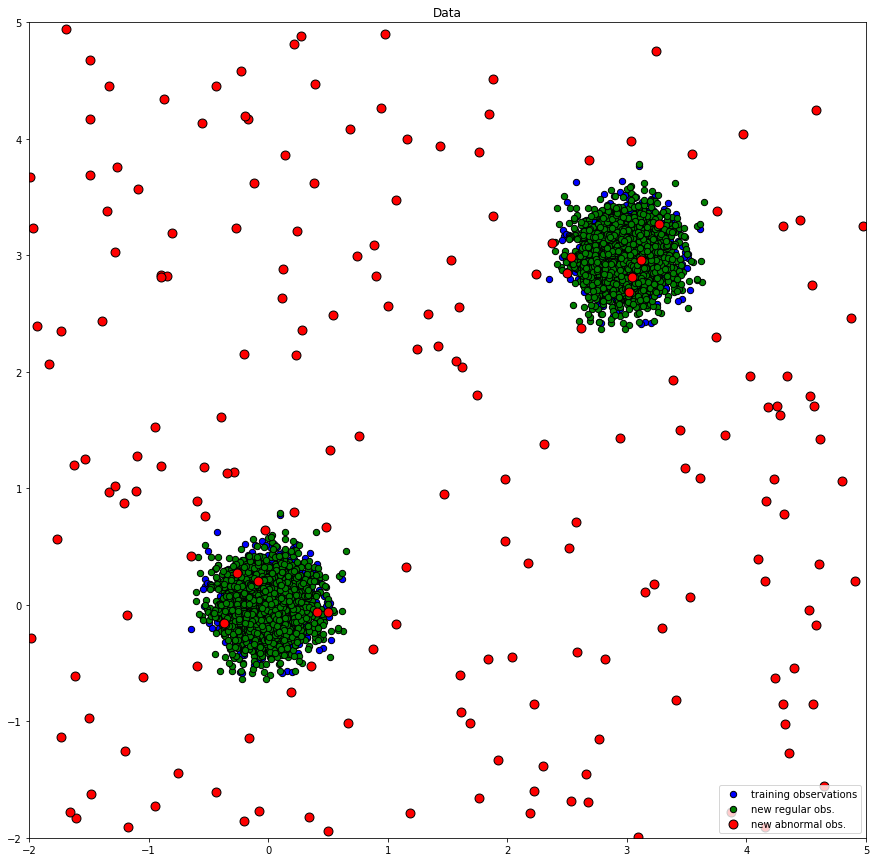

In [0]:
# Plotting generated data ----

plt.figure(figsize=(15,15))
plt.title("Data")

p1 = plt.scatter(X_train.x1, X_train.x2, c='blue', s=10*4, edgecolor='k')
p2 = plt.scatter(X_test.x1, X_test.x2, c='green', s=10*4, edgecolor='k')
p3 = plt.scatter(X_outliers.x1, X_outliers.x2, c='red', s=20*4, edgecolor='k')

plt.xlim((-2, 5))
plt.ylim((-2, 5))
plt.legend([p1, p2, p3],
           ["training observations",
            "new regular obs.", "new abnormal obs."],
           loc="lower right")
plt.show()

In [0]:
# Isolation Forest ----

# training the model
clf = IsolationForest(max_samples=128, contamination = 0.1, random_state=rng, behaviour='new')
clf.fit(X_train)

# predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [0]:
y_pred_test

array([-1, -1, -1, ...,  1,  1,  1])

In [0]:
# new, 'normal' observations ----
print("Normal Accuracy:", list(y_pred_test).count(1)/y_pred_test.shape[0])
# outliers ----
print("Outlier Accuracy:", list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0])
    

Normal Accuracy: 0.89675
Outlier Accuracy: 0.96


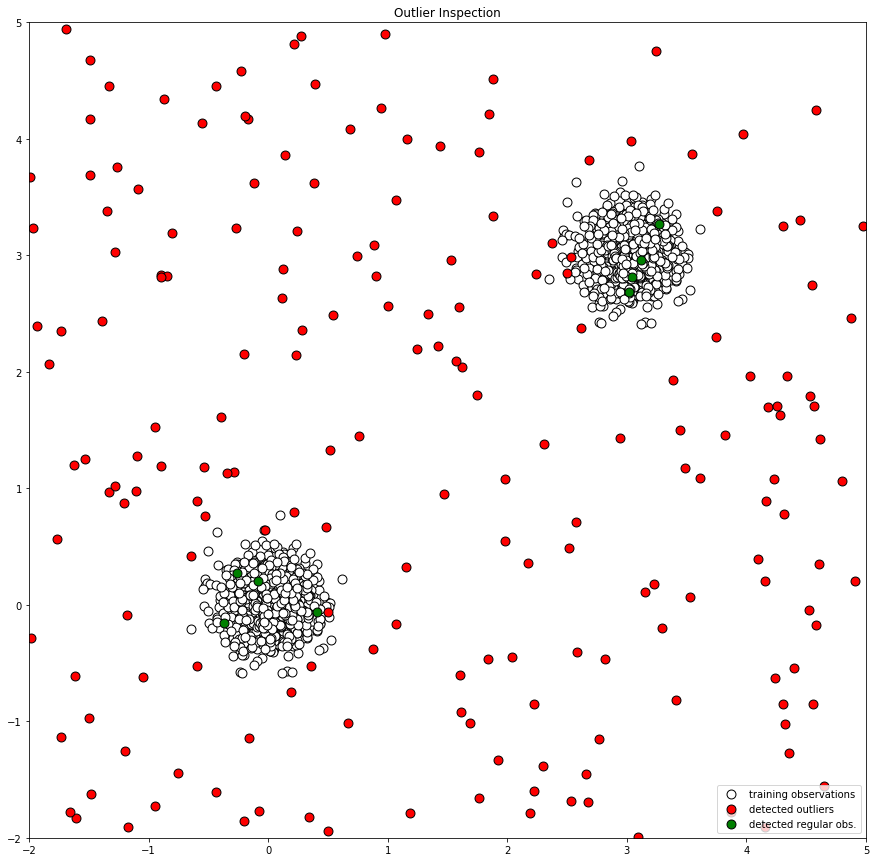

In [0]:
# Inspecting the outliers ----

# adding the predicted label
X_outliers = X_outliers.assign(y = y_pred_outliers)

plt.figure(figsize=(15,15))
plt.title("Outlier Inspection")

p1 = plt.scatter(X_train.x1, X_train.x2, c='white',
                 s=20*4, edgecolor='k')
p2 = plt.scatter(X_outliers.loc[X_outliers.y == -1, ['x1']], 
                 X_outliers.loc[X_outliers.y == -1, ['x2']], 
                 c='red', s=20*4, edgecolor='k')
p3 = plt.scatter(X_outliers.loc[X_outliers.y == 1, ['x1']], 
                 X_outliers.loc[X_outliers.y == 1, ['x2']], 
                 c='green', s=20*4, edgecolor='k')

plt.axis('tight')
plt.xlim((-2, 5))
plt.ylim((-2, 5))
plt.legend([p1, p2, p3],
           ["training observations",
            "detected outliers", 
            "detected regular obs."],
           loc="lower right")

# saving the figure
plt.savefig('outlier_inspection.png', dpi=300)

plt.show()